In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.stats as smd
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from sklearn.metrics import mean_absolute_error
import statsmodels.graphics.tsaplots as smplot

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import statsmodels
from scipy import stats

In [2]:
data = pd.read_csv('./tema7.csv', sep = ';')
y = data["y"]
x1 = data["x1"]
x2 = data["x2"]
x3 = data["x3"]
x4 = data["x4"]
data

,y,x1,x2,x3,x4
0,12345.0,2769.0,29.67,94.2,9.6
1,12091.9,3065.0,28.94,101.1,9.5
2,12339.7,3899.0,28.43,111.6,9.5
3,12450.6,3790.0,27.50,119.7,9.6
4,12832.1,3963.0,28.07,112.0,9.6
5,12892.1,4224.0,28.08,112.0,9.4
6,13224.5,4645.0,27.68,115.3,9.0
7,13449.9,4914.0,28.86,109.6,8.2
8,13476.8,4830.0,31.88,112.6,7.2
9,13588.9,4815.0,29.90,108.7,7.2


In [3]:
train = data[0:20]
train

,y,x1,x2,x3,x4
0,12345.0,2769.0,29.67,94.2,9.6
1,12091.9,3065.0,28.94,101.1,9.5
2,12339.7,3899.0,28.43,111.6,9.5
3,12450.6,3790.0,27.50,119.7,9.6
4,12832.1,3963.0,28.07,112.0,9.6
5,12892.1,4224.0,28.08,112.0,9.4
6,13224.5,4645.0,27.68,115.3,9.0
7,13449.9,4914.0,28.86,109.6,8.2
8,13476.8,4830.0,31.88,112.6,7.2
9,13588.9,4815.0,29.90,108.7,7.2


In [4]:
test = data[20:22]
test

,y,x1,x2,x3,x4
20,15644.4,5410.0,30.92,112.0,6.6
21,15717.8,5023.0,31.53,110.8,6.5


In [5]:
data.dtypes

y     float64
x1    float64
x2    float64
x3    float64
x4    float64
dtype: object

### Общая информация о ряде

In [6]:
model = statsmodels.formula.api.ols(formula="y ~ x1 + x2 + x3 + x4", data=train)
results = model.fit()
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     36.15
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.55e-07
Time:                        15:37:11   Log-Likelihood:                -144.58
No. Observations:                  20   AIC:                             299.2
Df Residuals:                      15   BIC:                             304.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.498e+04   4173.954      3.589      0.003    6084.449    2.39e+04
x1             0.4473      0.130      3.430      0.004       0.169       0.725
x2            36.6988     89.377      0.411      0.687    -153.805     227.202
x3           -19.1364     17.123     -1.118      0.281     -55.634      17.361
x4          -324.5281     52.813     -6.145      0.000    -437.096    -211.960
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.203
Skew:                           0.100   Prob(JB):                        0.903
Kurtosis:                       2.549   Cond. No.                     2.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Корреляции

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

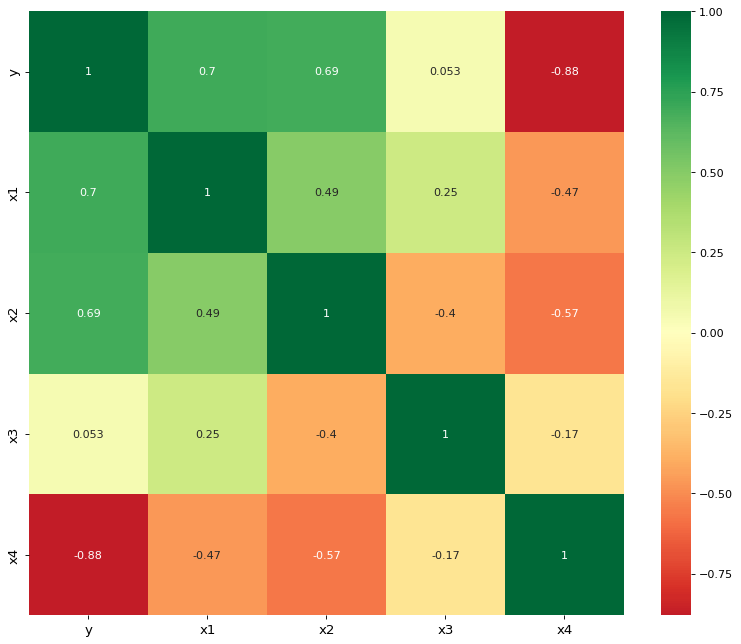

In [8]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(train.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./correl_all.png')
plt.show()

<Figure size 800x640 with 0 Axes>

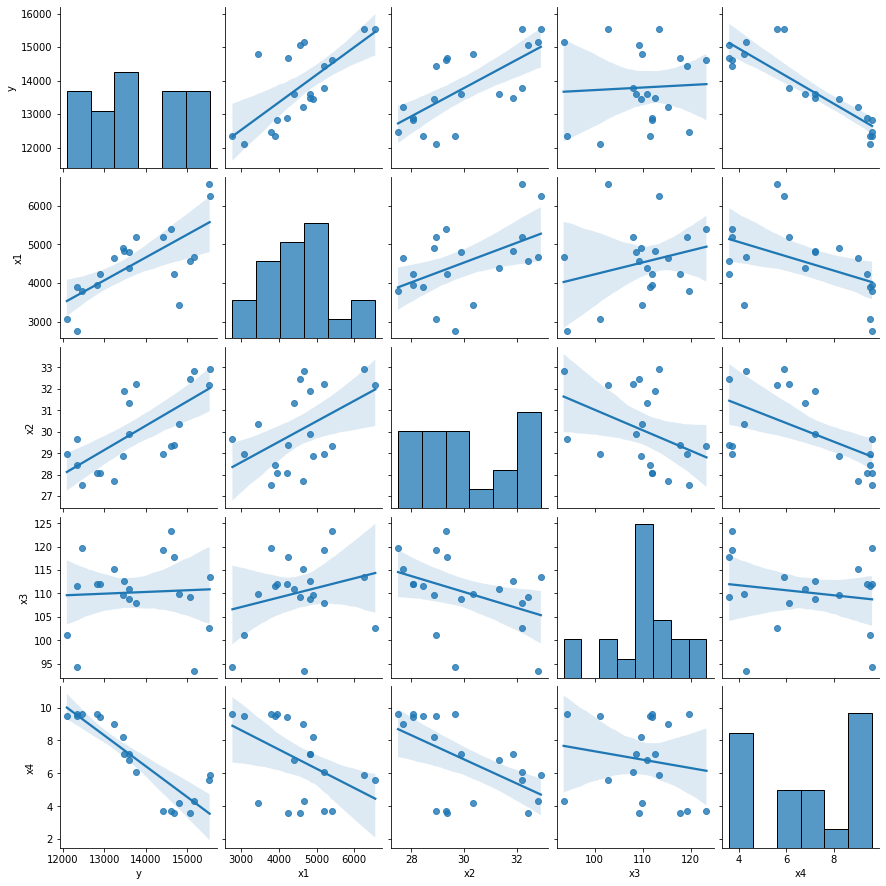

In [9]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(train, kind="reg")
plt.savefig('./correl_all_plts.png')
plt.show()

### Проверьте значимость модели регрессии в целом и каждого коэффициента модели по отдельности.

#### Коэфф детерминации R^2

In [10]:
print(results.rsquared)

0.906017889736171


Модель очень качественная R^2 = 0.906017889736171 (приближено к 1)

#### Скорректированный коэфф детерминации R^2

In [11]:
print(results.rsquared_adj)

0.8809559936658167


Модель очень качественная R^2 исп = 0.8809559936658167 (приближено к 1)

#### Средняя ошибка модели

In [12]:
print(np.sqrt(results.scale))

385.3485703727518


In [13]:
y

0     12345.0
1     12091.9
2     12339.7
3     12450.6
4     12832.1
5     12892.1
6     13224.5
7     13449.9
8     13476.8
9     13588.9
10    13600.4
11    13768.5
12    14796.6
13    14424.2
14    14607.3
15    14688.0
16    15057.3
17    15161.0
18    15534.6
19    15544.5
20    15644.4
21    15717.8
Name: y, dtype: float64

Качество хорошее т.к. относительно аргумента y дельта не очень большая

#### F-значение

In [14]:
results.fvalue

36.15121087378124

#### P-значения

In [15]:
p_values = results.summary2().tables[1]['P>|t|']
p_values

Intercept    0.002685
x1           0.003720
x2           0.687168
x3           0.281337
x4           0.000019
Name: P>|t|, dtype: float64

#### Сделайте выводы о качестве модели.

Можем сделать вывод о том, что модель качественная

#### Прогнозирование

In [16]:
test

,y,x1,x2,x3,x4
20,15644.4,5410.0,30.92,112.0,6.6
21,15717.8,5023.0,31.53,110.8,6.5


In [17]:
predicts = results.get_prediction(test).summary_frame(0.05)
predicts

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,14250.571960,126.652990,13980.617503,14520.526417,13385.995225,15115.148696
1,14155.262839,135.924016,13865.547656,14444.978022,13284.313696,15026.211982


yреал_20=15644.4; yреал_20∉(13385.995225;15115.148696) - предиктивный<br>
yреал_20=15644.4; yреал_20∉(13980.617503;14520.526417) - доверительный<br>

yреал_21=15717.8; yреал_21∉(13284.313696;15026.211982) - предиктивный<br>
yреал_21=15717.8; yреал_21∉(13865.547656;14444.978022) - доверительный<br>

**Модель неадекватна по обоим интервалам**

### Выкидыванием фактор x3

In [18]:
model2 = statsmodels.formula.api.ols(formula="y ~ x1 + x2 + x4", data=train)
results2 = model2.fit()
df2 = pd.read_html(results2.summary().tables[1].as_html(),header=0,index_col=0)[0]
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     47.05
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           3.67e-08
Time:                        15:37:13   Log-Likelihood:                -145.38
No. Observations:                  20   AIC:                             298.8
Df Residuals:                      16   BIC:                             302.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.086e+04   1968.134      5.517      0.000    6686.254     1.5e+04
x1             0.3716      0.112      3.310      0.004       0.134       0.610
x2           108.8831     62.255      1.749      0.099     -23.092     240.858
x4          -296.9100     47.036     -6.312      0.000    -396.621    -197.199
==============================================================================
Omnibus:                        0.560   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.626
Skew:                          -0.184   Prob(JB):                        0.731
Kurtosis:                       2.216   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Прогнозирование

In [19]:
test

,y,x1,x2,x3,x4
20,15644.4,5410.0,30.92,112.0,6.6
21,15717.8,5023.0,31.53,110.8,6.5


In [20]:
predicts2 = results2.get_prediction(test).summary_frame(0.05)
predicts2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,14275.686143,125.609252,14009.406423,14541.965863,13410.459547,15140.912739
1,14228.003972,120.250711,13973.083853,14482.924092,13366.205596,15089.802348


yреал_20=15644.4; yреал_20∉(13410.459547;15140.912739) - предиктивный<br>
yреал_20=15644.4; yреал_20∉(14009.406423;14541.965863) - доверительный<br>

yреал_21=15717.8; yреал_21∉(13366.205596;15089.802348) - предиктивный<br>
yреал_21=15717.8; yреал_21∉(13973.083853;14482.924092) - доверительный<br>

**Модель неадекватна по обоим интервалам**

### Выкидываем фактор x3 и x2

In [21]:
model3 = statsmodels.formula.api.ols(formula="y ~ x1 + x4", data=train)
results3 = model3.fit()
df3 = pd.read_html(results3.summary().tables[1].as_html(),header=0,index_col=0)[0]
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     61.59
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.63e-08
Time:                        15:37:13   Log-Likelihood:                -147.13
No. Observations:                  20   AIC:                             300.3
Df Residuals:                      17   BIC:                             303.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.409e+04    714.113     19.734      0.000    1.26e+04    1.56e+04
x1             0.4336      0.113      3.844      0.001       0.196       0.672
x4          -332.7165     44.838     -7.420      0.000    -427.316    -238.117
==============================================================================
Omnibus:                        0.226   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.421
Skew:                           0.043   Prob(JB):                        0.810
Kurtosis:                       2.295   Cond. No.                     3.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
test

,y,x1,x2,x3,x4
20,15644.4,5410.0,30.92,112.0,6.6
21,15717.8,5023.0,31.53,110.8,6.5


In [23]:
predicts3 = results3.get_prediction(test).summary_frame(0.05)
predicts3

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,14242.075714,131.432766,13964.776816,14519.374611,13331.321865,15152.829562
1,14107.551642,104.374703,13887.340267,14327.763017,13212.525975,15002.577309


yреал_20=15644.4; yреал_20∉(13331.321865;15152.829562) - предиктивный<br>
yреал_20=15644.4; yреал_20∉(13964.776816;14519.374611) - доверительный<br>

yреал_21=15717.8; yреал_21∉(13212.525975;15002.577309) - предиктивный<br>
yреал_21=15717.8; yреал_21∉(13887.340267;14327.763017) - доверительный<br>

**Модель все еще неадекватна по обоим интервалам**

### Ручной Тест Чоу для исходной модели

In [24]:
p0 = statsmodels.formula.api.ols(formula="y ~ x1 + x2 + x3 + x4", data=train)
h0 = p0.fit()

In [25]:
o1=train[0:10]
o1

,y,x1,x2,x3,x4
0,12345.0,2769.0,29.67,94.2,9.6
1,12091.9,3065.0,28.94,101.1,9.5
2,12339.7,3899.0,28.43,111.6,9.5
3,12450.6,3790.0,27.50,119.7,9.6
4,12832.1,3963.0,28.07,112.0,9.6
5,12892.1,4224.0,28.08,112.0,9.4
6,13224.5,4645.0,27.68,115.3,9.0
7,13449.9,4914.0,28.86,109.6,8.2
8,13476.8,4830.0,31.88,112.6,7.2
9,13588.9,4815.0,29.90,108.7,7.2


In [26]:
p1 = statsmodels.formula.api.ols(formula="y ~ x1 + x2 + x3 + x4", data=o1)
h1 = p1.fit()

In [27]:
o2=train[10:20]
o2

,y,x1,x2,x3,x4
10,13600.4,4401.0,31.32,110.9,6.8
11,13768.5,5189.0,32.20,108.0,6.1
12,14796.6,3434.0,30.36,109.8,4.2
13,14424.2,5195.0,28.95,119.2,3.7
14,14607.3,5401.0,29.33,123.3,3.7
15,14688.0,4239.0,29.36,117.8,3.6
16,15057.3,4558.0,32.45,109.2,3.6
17,15161.0,4675.0,32.82,93.5,4.3
18,15534.6,6558.0,32.19,102.7,5.6
19,15544.5,6253.0,32.92,113.5,5.9


In [28]:
p2 = statsmodels.formula.api.ols(formula="y ~ x1 + x2 + x3 + x4", data=o2)
h2 = p2.fit()

In [29]:
rss = h0.ssr
rss

2227402.8103248547

In [30]:
rss1 = h1.ssr
rss1

187626.8074825029

In [31]:
rss2 = h2.ssr
rss2

1420952.8190917235

In [32]:
n1 = h1.nobs
n2 = h2.nobs

In [33]:
k = h0.df_model

In [34]:
chow = (rss - rss1 - rss2) * (n1 + n2 - 2 * (k + 1)) / (k + 1) / (rss1 + rss2)
chow

0.7694032344156054

In [35]:
f_stat = stats.f.ppf(0.95,k +1, n1 + n2 - 2 * (k + 1))
f_stat

3.3258345304130112

In [36]:
# H0 принимается (chow < f_critical) - выборки однородны
if chow < f_stat:
    print("Выборки однородны")
else:
    print("Выборки неоднородны")

Выборки однородны


#### Jarque Bera Test

In [37]:
from scipy import stats
jarque_bera_test = stats.jarque_bera(results.resid)
jarque_bera_test

Jarque_beraResult(statistic=0.20331858511625497, pvalue=0.9033372729758542)

#### Строим модель y ~ x4

In [38]:
model4 = statsmodels.formula.api.ols(formula="y ~ x4", data=train)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     61.40
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           3.29e-07
Time:                        15:37:14   Log-Likelihood:                -153.39
No. Observations:                  20   AIC:                             310.8
Df Residuals:                      18   BIC:                             312.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.661e+04    379.440     43.771      0.000    1.58e+04    1.74e+04
x4          -413.0446     52.712     -7.836      0.000    -523.789    -302.300
==============================================================================
Omnibus:                       10.450   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.826
Skew:                           1.360   Prob(JB):                       0.0200
Kurtosis:                       4.412   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
r_many = results.rsquared
r_small = results4.rsquared
n = results.nobs
m = results.df_model + 1
q = m - results4.df_model - 1
f_value = (r_many - r_small)/(1 - r_many) * (n-m)/q
f_value

7.060842160611142

In [40]:
f_t_value = stats.f.ppf(1-0.05,q,n-m)
f_t_value

3.2873821046365115

In [41]:
if  f_value > f_t_value:
    print(f"{f_value} > {f_t_value} -> H0 отвергается, длинная регрессия")
else:
    print(f"{f_value} < {f_t_value} ->  H0 принимается, короткая регрессия")

7.060842160611142 > 3.2873821046365115 -> H0 отвергается, длинная регрессия


#### Тест Рамсея (авто)

In [42]:
from statsmodels.stats.outliers_influence import reset_ramsey
alpha = 0.01
rs_value = reset_ramsey(results, degree=3)
if rs_value.pvalue < alpha:
    print(f"{rs_value.pvalue} < {alpha} -> H0 отвергается, пропущенные факторы есть")
else:
    print(f"{rs_value.pvalue} > {alpha} -> H0 принимается, пропущенных факторов нет")

0.38143125117367327 > 0.01 -> H0 принимается, пропущенных факторов нет


#### Тест Рамсея (вручную)

In [43]:
yp=results.predict()
yp2=yp**2
yp3=yp**3

model5 = statsmodels.formula.api.ols(formula="y ~ x1 + x2 + x3 + x4 + yp2 + yp3", data=train)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     27.94
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           8.17e-07
Time:                        15:37:14   Log-Likelihood:                -144.27
No. Observations:                  20   AIC:                             300.5
Df Residuals:                      14   BIC:                             306.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8813      7.311      1.215      0.245      -6.799      24.562
x1            -0.4075      0.354     -1.151      0.269      -1.167       0.352
x2           -13.2456    105.558     -0.125      0.902    -239.645     213.154
x3            21.3040     22.048      0.966      0.350     -25.984      68.592
x4           282.1139    229.031      1.232      0.238    -209.108     773.336
yp2          4.87e-05   8.72e-05      0.558      0.585      -0.000       0.000
yp3         9.155e-10    5.1e-09      0.180      0.860      -1e-08    1.19e-08
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.205
Skew:                           0.179   Prob(JB):                        0.902
Kurtosis:                       2.656   Cond. No.                     4.75e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
results5.rsquared

0.9089205027017837

In [45]:
results5.rsquared

0.9089205027017837

In [49]:
r_many = results.rsquared
r_small = results5.rsquared
n = results.nobs
m = results.df_model + 1
q = m - results5.df_model - 1
f_value = (r_many - r_small)/(1 - r_many) * (n-m)/q
f_value

0.46327108810353107